In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
#import mpl_scatter_density
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
from scipy import stats

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from scipy.stats import gaussian_kde
import skimage
import plotly.graph_objects as go

from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from statistics import mode
from matplotlib import transforms
import netCDF4

import os
import moviepy.video.io.ImageSequenceClip
from IPython.display import Video

import dash_bio
import seaborn

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
size = 15
name = 'all'

In [4]:
vae_dummy_array = np.empty(shape=(size,49,9,9))
pca_dummy_array = np.empty(shape=(size,49,9,9))
k_dummy_array = np.empty(shape=(size,49,9,9))

In [5]:
vae_icon_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/icon_spcam_kl_"+str(name)+".npy")
vae_icon_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/icon_sam_kl_"+str(name)+".npy")
vae_icon_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/icon_um_kl_"+str(name)+".npy")
vae_icon_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/icon_ifs_kl_"+str(name)+".npy")
vae_icon_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/icon_shield_kl_"+str(name)+".npy")
vae_icon_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/icon_nicam_kl_"+str(name)+".npy")
vae_icon_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/icon_arpege_kl_"+str(name)+".npy")
vae_icon_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/icon_gem_kl_"+str(name)+".npy")

vae_ifs_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/ifs_spcam_kl_"+str(name)+".npy")
vae_ifs_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/ifs_sam_kl_"+str(name)+".npy")
vae_ifs_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/ifs_um_kl_"+str(name)+".npy")
vae_ifs_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/ifs_gem_kl_"+str(name)+".npy")
vae_ifs_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/ifs_shield_kl_"+str(name)+".npy")
vae_ifs_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/ifs_nicam_kl_"+str(name)+".npy")
vae_ifs_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/ifs_icon_kl_"+str(name)+".npy")
vae_ifs_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/ifs_arpege_kl_"+str(name)+".npy")

vae_spcam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_shield_kl_"+str(name)+".npy")
vae_spcam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_nicam_kl_"+str(name)+".npy")
vae_spcam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_um_kl_"+str(name)+".npy")
vae_spcam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_gem_kl_"+str(name)+".npy")
vae_spcam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_sam_kl_"+str(name)+".npy")
vae_spcam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_ifs_kl_"+str(name)+".npy")
vae_spcam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_icon_kl_"+str(name)+".npy")
vae_spcam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_arpege_kl_"+str(name)+".npy")

vae_spcam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_shield_kl_"+str(name)+".npy")
vae_spcam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_nicam_kl_"+str(name)+".npy")
vae_spcam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_um_kl_"+str(name)+".npy")
vae_spcam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_gem_kl_"+str(name)+".npy")
vae_spcam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_sam_kl_"+str(name)+".npy")
vae_spcam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_ifs_kl_"+str(name)+".npy")
vae_spcam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_icon_kl_"+str(name)+".npy")
vae_spcam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/spcam_arpege_kl_"+str(name)+".npy")

vae_shield_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/shield_spcam_kl_"+str(name)+".npy")
vae_shield_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/shield_nicam_kl_"+str(name)+".npy")
vae_shield_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/shield_um_kl_"+str(name)+".npy")
vae_shield_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/shield_gem_kl_"+str(name)+".npy")
vae_shield_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/shield_sam_kl_"+str(name)+".npy")
vae_shield_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/shield_ifs_kl_"+str(name)+".npy")
vae_shield_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/shield_icon_kl_"+str(name)+".npy")
vae_shield_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/shield_arpege_kl_"+str(name)+".npy")

vae_sam_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/sam_spcam_kl_"+str(name)+".npy")
vae_sam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/sam_nicam_kl_"+str(name)+".npy")
vae_sam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/sam_um_kl_"+str(name)+".npy")
vae_sam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/sam_gem_kl_"+str(name)+".npy")
vae_sam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/sam_shield_kl_"+str(name)+".npy")
vae_sam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/sam_ifs_kl_"+str(name)+".npy")
vae_sam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/sam_icon_kl_"+str(name)+".npy")
vae_sam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/sam_arpege_kl_"+str(name)+".npy")

vae_arpege_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/arpege_spcam_kl_"+str(name)+".npy")
vae_arpege_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/arpege_sam_kl_"+str(name)+".npy")
vae_arpege_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/arpege_um_kl_"+str(name)+".npy")
vae_arpege_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/arpege_ifs_kl_"+str(name)+".npy")
vae_arpege_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/arpege_shield_kl_"+str(name)+".npy")
vae_arpege_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/arpege_nicam_kl_"+str(name)+".npy")
vae_arpege_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/arpege_icon_kl_"+str(name)+".npy")
vae_arpege_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/arpege_gem_kl_"+str(name)+".npy")

vae_um_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/um_shield_kl_"+str(name)+".npy")
vae_um_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/um_nicam_kl_"+str(name)+".npy")
vae_um_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/um_spcam_kl_"+str(name)+".npy")
vae_um_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/um_gem_kl_"+str(name)+".npy")
vae_um_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/um_sam_kl_"+str(name)+".npy")
vae_um_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/um_ifs_kl_"+str(name)+".npy")
vae_um_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/um_icon_kl_"+str(name)+".npy")
vae_um_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/um_arpege_kl_"+str(name)+".npy")

vae_nicam_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/nicam_spcam_kl_"+str(name)+".npy")
vae_nicam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/nicam_sam_kl_"+str(name)+".npy")
vae_nicam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/nicam_um_kl_"+str(name)+".npy")
vae_nicam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/nicam_gem_kl_"+str(name)+".npy")
vae_nicam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/nicam_shield_kl_"+str(name)+".npy")
vae_nicam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/nicam_ifs_kl_"+str(name)+".npy")
vae_nicam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/nicam_icon_kl_"+str(name)+".npy")
vae_nicam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/nicam_arpege_kl_"+str(name)+".npy")

vae_gem_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/gem_spcam_kl_"+str(name)+".npy")
vae_gem_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/gem_sam_kl_"+str(name)+".npy")
vae_gem_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/gem_um_kl_"+str(name)+".npy")
vae_gem_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/gem_ifs_kl_"+str(name)+".npy")
vae_gem_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/gem_shield_kl_"+str(name)+".npy")
vae_gem_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/gem_nicam_kl_"+str(name)+".npy")
vae_gem_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/gem_icon_kl_"+str(name)+".npy")
vae_gem_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/VAE/Compressed_Data/gem_arpege_kl_"+str(name)+".npy")

In [6]:
pca_icon_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/icon_spcam_kl_"+str(name)+".npy")
pca_icon_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/icon_sam_kl_"+str(name)+".npy")
pca_icon_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/icon_um_kl_"+str(name)+".npy")
pca_icon_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/icon_ifs_kl_"+str(name)+".npy")
pca_icon_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/icon_shield_kl_"+str(name)+".npy")
pca_icon_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/icon_nicam_kl_"+str(name)+".npy")
pca_icon_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/icon_arpege_kl_"+str(name)+".npy")
pca_icon_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/icon_gem_kl_"+str(name)+".npy")

pca_ifs_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/ifs_spcam_kl_"+str(name)+".npy")
pca_ifs_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/ifs_sam_kl_"+str(name)+".npy")
pca_ifs_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/ifs_um_kl_"+str(name)+".npy")
pca_ifs_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/ifs_gem_kl_"+str(name)+".npy")
pca_ifs_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/ifs_shield_kl_"+str(name)+".npy")
pca_ifs_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/ifs_nicam_kl_"+str(name)+".npy")
pca_ifs_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/ifs_icon_kl_"+str(name)+".npy")
pca_ifs_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/ifs_arpege_kl_"+str(name)+".npy")

pca_spcam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_shield_kl_"+str(name)+".npy")
pca_spcam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_nicam_kl_"+str(name)+".npy")
pca_spcam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_um_kl_"+str(name)+".npy")
pca_spcam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_gem_kl_"+str(name)+".npy")
pca_spcam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_sam_kl_"+str(name)+".npy")
pca_spcam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_ifs_kl_"+str(name)+".npy")
pca_spcam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_icon_kl_"+str(name)+".npy")
pca_spcam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_arpege_kl_"+str(name)+".npy")

pca_spcam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_shield_kl_"+str(name)+".npy")
pca_spcam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_nicam_kl_"+str(name)+".npy")
pca_spcam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_um_kl_"+str(name)+".npy")
pca_spcam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_gem_kl_"+str(name)+".npy")
pca_spcam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_sam_kl_"+str(name)+".npy")
pca_spcam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_ifs_kl_"+str(name)+".npy")
pca_spcam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_icon_kl_"+str(name)+".npy")
pca_spcam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/spcam_arpege_kl_"+str(name)+".npy")

pca_shield_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/shield_spcam_kl_"+str(name)+".npy")
pca_shield_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/shield_nicam_kl_"+str(name)+".npy")
pca_shield_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/shield_um_kl_"+str(name)+".npy")
pca_shield_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/shield_gem_kl_"+str(name)+".npy")
pca_shield_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/shield_sam_kl_"+str(name)+".npy")
pca_shield_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/shield_ifs_kl_"+str(name)+".npy")
pca_shield_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/shield_icon_kl_"+str(name)+".npy")
pca_shield_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/shield_arpege_kl_"+str(name)+".npy")

pca_sam_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/sam_spcam_kl_"+str(name)+".npy")
pca_sam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/sam_nicam_kl_"+str(name)+".npy")
pca_sam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/sam_um_kl_"+str(name)+".npy")
pca_sam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/sam_gem_kl_"+str(name)+".npy")
pca_sam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/sam_shield_kl_"+str(name)+".npy")
pca_sam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/sam_ifs_kl_"+str(name)+".npy")
pca_sam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/sam_icon_kl_"+str(name)+".npy")
pca_sam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/sam_arpege_kl_"+str(name)+".npy")

pca_arpege_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/arpege_spcam_kl_"+str(name)+".npy")
pca_arpege_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/arpege_sam_kl_"+str(name)+".npy")
pca_arpege_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/arpege_um_kl_"+str(name)+".npy")
pca_arpege_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/arpege_ifs_kl_"+str(name)+".npy")
pca_arpege_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/arpege_shield_kl_"+str(name)+".npy")
pca_arpege_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/arpege_nicam_kl_"+str(name)+".npy")
pca_arpege_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/arpege_icon_kl_"+str(name)+".npy")
pca_arpege_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/arpege_gem_kl_"+str(name)+".npy")

pca_um_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/um_shield_kl_"+str(name)+".npy")
pca_um_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/um_nicam_kl_"+str(name)+".npy")
pca_um_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/um_spcam_kl_"+str(name)+".npy")
pca_um_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/um_gem_kl_"+str(name)+".npy")
pca_um_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/um_sam_kl_"+str(name)+".npy")
pca_um_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/um_ifs_kl_"+str(name)+".npy")
pca_um_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/um_icon_kl_"+str(name)+".npy")
pca_um_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/um_arpege_kl_"+str(name)+".npy")

pca_nicam_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/nicam_spcam_kl_"+str(name)+".npy")
pca_nicam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/nicam_sam_kl_"+str(name)+".npy")
pca_nicam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/nicam_um_kl_"+str(name)+".npy")
pca_nicam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/nicam_gem_kl_"+str(name)+".npy")
pca_nicam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/nicam_shield_kl_"+str(name)+".npy")
pca_nicam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/nicam_ifs_kl_"+str(name)+".npy")
pca_nicam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/nicam_icon_kl_"+str(name)+".npy")
pca_nicam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/nicam_arpege_kl_"+str(name)+".npy")

pca_gem_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/gem_spcam_kl_"+str(name)+".npy")
pca_gem_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/gem_sam_kl_"+str(name)+".npy")
pca_gem_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/gem_um_kl_"+str(name)+".npy")
pca_gem_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/gem_ifs_kl_"+str(name)+".npy")
pca_gem_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/gem_shield_kl_"+str(name)+".npy")
pca_gem_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/gem_nicam_kl_"+str(name)+".npy")
pca_gem_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/gem_icon_kl_"+str(name)+".npy")
pca_gem_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/PCA/Compressed_Data/gem_arpege_kl_"+str(name)+".npy")

In [7]:
k_icon_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/icon_spcam_kl_"+str(name)+".npy")
k_icon_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/icon_sam_kl_"+str(name)+".npy")
k_icon_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/icon_um_kl_"+str(name)+".npy")
k_icon_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/icon_ifs_kl_"+str(name)+".npy")
k_icon_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/icon_shield_kl_"+str(name)+".npy")
k_icon_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/icon_nicam_kl_"+str(name)+".npy")
k_icon_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/icon_arpege_kl_"+str(name)+".npy")
k_icon_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/icon_gem_kl_"+str(name)+".npy")

k_ifs_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/ifs_spcam_kl_"+str(name)+".npy")
k_ifs_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/ifs_sam_kl_"+str(name)+".npy")
k_ifs_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/ifs_um_kl_"+str(name)+".npy")
k_ifs_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/ifs_gem_kl_"+str(name)+".npy")
k_ifs_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/ifs_shield_kl_"+str(name)+".npy")
k_ifs_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/ifs_nicam_kl_"+str(name)+".npy")
k_ifs_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/ifs_icon_kl_"+str(name)+".npy")
k_ifs_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/ifs_arpege_kl_"+str(name)+".npy")

k_spcam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_shield_kl_"+str(name)+".npy")
k_spcam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_nicam_kl_"+str(name)+".npy")
k_spcam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_um_kl_"+str(name)+".npy")
k_spcam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_gem_kl_"+str(name)+".npy")
k_spcam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_sam_kl_"+str(name)+".npy")
k_spcam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_ifs_kl_"+str(name)+".npy")
k_spcam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_icon_kl_"+str(name)+".npy")
k_spcam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_arpege_kl_"+str(name)+".npy")

k_spcam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_shield_kl_"+str(name)+".npy")
k_spcam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_nicam_kl_"+str(name)+".npy")
k_spcam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_um_kl_"+str(name)+".npy")
k_spcam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_gem_kl_"+str(name)+".npy")
k_spcam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_sam_kl_"+str(name)+".npy")
k_spcam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_ifs_kl_"+str(name)+".npy")
k_spcam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_icon_kl_"+str(name)+".npy")
k_spcam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/spcam_arpege_kl_"+str(name)+".npy")

k_shield_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/shield_spcam_kl_"+str(name)+".npy")
k_shield_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/shield_nicam_kl_"+str(name)+".npy")
k_shield_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/shield_um_kl_"+str(name)+".npy")
k_shield_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/shield_gem_kl_"+str(name)+".npy")
k_shield_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/shield_sam_kl_"+str(name)+".npy")
k_shield_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/shield_ifs_kl_"+str(name)+".npy")
k_shield_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/shield_icon_kl_"+str(name)+".npy")
k_shield_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/shield_arpege_kl_"+str(name)+".npy")

k_sam_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/sam_spcam_kl_"+str(name)+".npy")
k_sam_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/sam_nicam_kl_"+str(name)+".npy")
k_sam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/sam_um_kl_"+str(name)+".npy")
k_sam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/sam_gem_kl_"+str(name)+".npy")
k_sam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/sam_shield_kl_"+str(name)+".npy")
k_sam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/sam_ifs_kl_"+str(name)+".npy")
k_sam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/sam_icon_kl_"+str(name)+".npy")
k_sam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/sam_arpege_kl_"+str(name)+".npy")

k_arpege_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/arpege_spcam_kl_"+str(name)+".npy")
k_arpege_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/arpege_sam_kl_"+str(name)+".npy")
k_arpege_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/arpege_um_kl_"+str(name)+".npy")
k_arpege_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/arpege_ifs_kl_"+str(name)+".npy")
k_arpege_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/arpege_shield_kl_"+str(name)+".npy")
k_arpege_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/arpege_nicam_kl_"+str(name)+".npy")
k_arpege_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/arpege_icon_kl_"+str(name)+".npy")
k_arpege_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/arpege_gem_kl_"+str(name)+".npy")

k_um_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/um_shield_kl_"+str(name)+".npy")
k_um_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/um_nicam_kl_"+str(name)+".npy")
k_um_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/um_spcam_kl_"+str(name)+".npy")
k_um_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/um_gem_kl_"+str(name)+".npy")
k_um_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/um_sam_kl_"+str(name)+".npy")
k_um_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/um_ifs_kl_"+str(name)+".npy")
k_um_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/um_icon_kl_"+str(name)+".npy")
k_um_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/um_arpege_kl_"+str(name)+".npy")

k_nicam_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/nicam_spcam_kl_"+str(name)+".npy")
k_nicam_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/nicam_sam_kl_"+str(name)+".npy")
k_nicam_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/nicam_um_kl_"+str(name)+".npy")
k_nicam_gem_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/nicam_gem_kl_"+str(name)+".npy")
k_nicam_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/nicam_shield_kl_"+str(name)+".npy")
k_nicam_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/nicam_ifs_kl_"+str(name)+".npy")
k_nicam_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/nicam_icon_kl_"+str(name)+".npy")
k_nicam_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/nicam_arpege_kl_"+str(name)+".npy")

k_gem_spcam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/gem_spcam_kl_"+str(name)+".npy")
k_gem_sam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/gem_sam_kl_"+str(name)+".npy")
k_gem_um_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/gem_um_kl_"+str(name)+".npy")
k_gem_ifs_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/gem_ifs_kl_"+str(name)+".npy")
k_gem_shield_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/gem_shield_kl_"+str(name)+".npy")
k_gem_nicam_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/gem_nicam_kl_"+str(name)+".npy")
k_gem_icon_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/gem_icon_kl_"+str(name)+".npy")
k_gem_arpege_kl_avg = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Automated/K_Means/Compressed_Data/gem_arpege_kl_"+str(name)+".npy")

In [8]:
for a in range(size):
    for i in range(len(vae_dummy_array[0])):
        vae_dummy_array[a,i,0,0] = 0.0
        vae_dummy_array[a,i,1,0] = vae_icon_ifs_kl_avg[a,i] + vae_ifs_icon_kl_avg[a,i]
        vae_dummy_array[a,i,2,0] = vae_icon_spcam_kl_avg[a,i] + vae_spcam_icon_kl_avg[a,i]
        vae_dummy_array[a,i,3,0] = vae_icon_shield_kl_avg[a,i] + vae_shield_icon_kl_avg[a,i]
        vae_dummy_array[a,i,4,0] = vae_icon_sam_kl_avg[a,i] + vae_sam_icon_kl_avg[a,i]
        vae_dummy_array[a,i,5,0] = vae_icon_arpege_kl_avg[a,i] + vae_arpege_icon_kl_avg[a,i]
        vae_dummy_array[a,i,6,0] = vae_icon_um_kl_avg[a,i] + vae_um_icon_kl_avg[a,i]
        vae_dummy_array[a,i,7,0] = vae_icon_nicam_kl_avg[a,i] + vae_nicam_icon_kl_avg[a,i]
        vae_dummy_array[a,i,8,0] = vae_icon_gem_kl_avg[a,i] + vae_gem_icon_kl_avg[a,i]
    
        vae_dummy_array[a,i,0,1] = vae_ifs_icon_kl_avg[a,i] + vae_icon_ifs_kl_avg[a,i]
        vae_dummy_array[a,i,1,1] = 0.0
        vae_dummy_array[a,i,2,1] = vae_ifs_spcam_kl_avg[a,i] + vae_spcam_ifs_kl_avg[a,i]
        vae_dummy_array[a,i,3,1] = vae_ifs_shield_kl_avg[a,i] + vae_shield_ifs_kl_avg[a,i]
        vae_dummy_array[a,i,4,1] = vae_ifs_sam_kl_avg[a,i] + vae_sam_ifs_kl_avg[a,i]
        vae_dummy_array[a,i,5,1] = vae_ifs_arpege_kl_avg[a,i] + vae_arpege_ifs_kl_avg[a,i]
        vae_dummy_array[a,i,6,1] = vae_ifs_um_kl_avg[a,i] + vae_um_ifs_kl_avg[a,i]
        vae_dummy_array[a,i,7,1] = vae_ifs_nicam_kl_avg[a,i] + vae_nicam_ifs_kl_avg[a,i]
        vae_dummy_array[a,i,8,1] = vae_ifs_gem_kl_avg[a,i] + vae_gem_ifs_kl_avg[a,i]
    
        vae_dummy_array[a,i,0,2] = vae_spcam_icon_kl_avg[a,i] + vae_icon_spcam_kl_avg[a,i]
        vae_dummy_array[a,i,1,2] = vae_spcam_ifs_kl_avg[a,i] + vae_ifs_spcam_kl_avg[a,i]
        vae_dummy_array[a,i,2,2] = 0.0
        vae_dummy_array[a,i,3,2] = vae_spcam_shield_kl_avg[a,i] + vae_shield_spcam_kl_avg[a,i]
        vae_dummy_array[a,i,4,2] = vae_spcam_sam_kl_avg[a,i] + vae_sam_spcam_kl_avg[a,i]
        vae_dummy_array[a,i,5,2] = vae_spcam_arpege_kl_avg[a,i] + vae_arpege_spcam_kl_avg[a,i]
        vae_dummy_array[a,i,6,2] = vae_spcam_um_kl_avg[a,i] + vae_um_spcam_kl_avg[a,i]
        vae_dummy_array[a,i,7,2] = vae_spcam_nicam_kl_avg[a,i] + vae_nicam_spcam_kl_avg[a,i]
        vae_dummy_array[a,i,8,2] = vae_spcam_gem_kl_avg[a,i] + vae_gem_spcam_kl_avg[a,i]
    
        vae_dummy_array[a,i,0,3] = vae_shield_icon_kl_avg[a,i] + vae_icon_shield_kl_avg[a,i]
        vae_dummy_array[a,i,1,3] = vae_shield_ifs_kl_avg[a,i] + vae_ifs_shield_kl_avg[a,i]
        vae_dummy_array[a,i,2,3] = vae_shield_spcam_kl_avg[a,i] + vae_spcam_shield_kl_avg[a,i]
        vae_dummy_array[a,i,3,3] = 0.0
        vae_dummy_array[a,i,4,3] = vae_shield_sam_kl_avg[a,i] + vae_sam_shield_kl_avg[a,i]
        vae_dummy_array[a,i,5,3] = vae_shield_arpege_kl_avg[a,i] + vae_arpege_shield_kl_avg[a,i]
        vae_dummy_array[a,i,6,3] = vae_shield_um_kl_avg[a,i] + vae_um_shield_kl_avg[a,i]
        vae_dummy_array[a,i,7,3] = vae_shield_nicam_kl_avg[a,i] + vae_nicam_shield_kl_avg[a,i]
        vae_dummy_array[a,i,8,3] = vae_shield_gem_kl_avg[a,i] + vae_gem_shield_kl_avg[a,i]
    
        vae_dummy_array[a,i,0,4] = vae_sam_icon_kl_avg[a,i] + vae_icon_sam_kl_avg[a,i]
        vae_dummy_array[a,i,1,4] = vae_sam_ifs_kl_avg[a,i] + vae_ifs_sam_kl_avg[a,i]
        vae_dummy_array[a,i,2,4] = vae_sam_spcam_kl_avg[a,i] + vae_spcam_sam_kl_avg[a,i]
        vae_dummy_array[a,i,3,4] = vae_sam_shield_kl_avg[a,i] + vae_shield_sam_kl_avg[a,i]
        vae_dummy_array[a,i,4,4] = 0.0
        vae_dummy_array[a,i,5,4] = vae_sam_arpege_kl_avg[a,i] + vae_arpege_sam_kl_avg[a,i]
        vae_dummy_array[a,i,6,4] = vae_sam_um_kl_avg[a,i] + vae_um_sam_kl_avg[a,i]
        vae_dummy_array[a,i,7,4] = vae_sam_nicam_kl_avg[a,i] + vae_nicam_sam_kl_avg[a,i]
        vae_dummy_array[a,i,8,4] = vae_sam_gem_kl_avg[a,i] + vae_gem_sam_kl_avg[a,i]
    
        vae_dummy_array[a,i,0,5] = vae_arpege_icon_kl_avg[a,i] + vae_icon_arpege_kl_avg[a,i]
        vae_dummy_array[a,i,1,5] = vae_arpege_ifs_kl_avg[a,i] + vae_ifs_arpege_kl_avg[a,i]
        vae_dummy_array[a,i,2,5] = vae_arpege_spcam_kl_avg[a,i] + vae_spcam_arpege_kl_avg[a,i]
        vae_dummy_array[a,i,3,5] = vae_arpege_shield_kl_avg[a,i] + vae_shield_arpege_kl_avg[a,i]
        vae_dummy_array[a,i,4,5] = vae_arpege_sam_kl_avg[a,i] + vae_sam_arpege_kl_avg[a,i]
        vae_dummy_array[a,i,5,5] = 0.0
        vae_dummy_array[a,i,6,5] = vae_arpege_um_kl_avg[a,i] + vae_um_arpege_kl_avg[a,i]
        vae_dummy_array[a,i,7,5] = vae_arpege_nicam_kl_avg[a,i] + vae_nicam_arpege_kl_avg[a,i]
        vae_dummy_array[a,i,8,5] = vae_arpege_gem_kl_avg[a,i] + vae_gem_arpege_kl_avg[a,i]
    
        vae_dummy_array[a,i,0,6] = vae_um_icon_kl_avg[a,i] + vae_icon_um_kl_avg[a,i]
        vae_dummy_array[a,i,1,6] = vae_um_ifs_kl_avg[a,i] + vae_ifs_um_kl_avg[a,i]
        vae_dummy_array[a,i,2,6] = vae_um_spcam_kl_avg[a,i] + vae_spcam_um_kl_avg[a,i]
        vae_dummy_array[a,i,3,6] = vae_um_shield_kl_avg[a,i] + vae_shield_um_kl_avg[a,i]
        vae_dummy_array[a,i,4,6] = vae_um_sam_kl_avg[a,i] + vae_sam_um_kl_avg[a,i]
        vae_dummy_array[a,i,5,6] = vae_um_arpege_kl_avg[a,i] + vae_arpege_um_kl_avg[a,i]
        vae_dummy_array[a,i,6,6] = 0.0
        vae_dummy_array[a,i,7,6] = vae_um_nicam_kl_avg[a,i] + vae_nicam_um_kl_avg[a,i]
        vae_dummy_array[a,i,8,6] = vae_um_gem_kl_avg[a,i] + vae_gem_um_kl_avg[a,i]
    
        vae_dummy_array[a,i,0,7] = vae_nicam_icon_kl_avg[a,i] + vae_icon_nicam_kl_avg[a,i]
        vae_dummy_array[a,i,1,7] = vae_nicam_ifs_kl_avg[a,i] + vae_ifs_nicam_kl_avg[a,i]
        vae_dummy_array[a,i,2,7] = vae_nicam_spcam_kl_avg[a,i] + vae_spcam_nicam_kl_avg[a,i]
        vae_dummy_array[a,i,3,7] = vae_nicam_shield_kl_avg[a,i] + vae_shield_nicam_kl_avg[a,i]
        vae_dummy_array[a,i,4,7] = vae_nicam_sam_kl_avg[a,i] + vae_sam_nicam_kl_avg[a,i]
        vae_dummy_array[a,i,5,7] = vae_nicam_arpege_kl_avg[a,i] + vae_arpege_nicam_kl_avg[a,i]
        vae_dummy_array[a,i,6,7] = vae_nicam_um_kl_avg[a,i] + vae_um_nicam_kl_avg[a,i]
        vae_dummy_array[a,i,7,7] = 0.0
        vae_dummy_array[a,i,8,7] = vae_nicam_gem_kl_avg[a,i] + vae_gem_nicam_kl_avg[a,i]
    
        vae_dummy_array[a,i,0,8] = vae_gem_icon_kl_avg[a,i] + vae_icon_gem_kl_avg[a,i]
        vae_dummy_array[a,i,1,8] = vae_gem_ifs_kl_avg[a,i] + vae_ifs_gem_kl_avg[a,i]
        vae_dummy_array[a,i,2,8] = vae_gem_spcam_kl_avg[a,i] + vae_spcam_gem_kl_avg[a,i]
        vae_dummy_array[a,i,3,8] = vae_gem_shield_kl_avg[a,i] + vae_shield_gem_kl_avg[a,i]
        vae_dummy_array[a,i,4,8] = vae_gem_sam_kl_avg[a,i] + vae_sam_gem_kl_avg[a,i]
        vae_dummy_array[a,i,5,8] = vae_gem_arpege_kl_avg[a,i] + vae_arpege_gem_kl_avg[a,i]
        vae_dummy_array[a,i,6,8] = vae_gem_um_kl_avg[a,i] + vae_um_gem_kl_avg[a,i]
        vae_dummy_array[a,i,7,8] = vae_gem_nicam_kl_avg[a,i] + vae_nicam_gem_kl_avg[a,i]
        vae_dummy_array[a,i,8,8] = 0.0

In [9]:
for a in range(size):
    for i in range(len(pca_dummy_array[a])):
        pca_dummy_array[a,i,0,0] = 0.0
        pca_dummy_array[a,i,1,0] = pca_icon_ifs_kl_avg[a,i] + pca_ifs_icon_kl_avg[a,i]
        pca_dummy_array[a,i,2,0] = pca_icon_spcam_kl_avg[a,i] + pca_spcam_icon_kl_avg[a,i]
        pca_dummy_array[a,i,3,0] = pca_icon_shield_kl_avg[a,i] + pca_shield_icon_kl_avg[a,i]
        pca_dummy_array[a,i,4,0] = pca_icon_sam_kl_avg[a,i] + pca_sam_icon_kl_avg[a,i]
        pca_dummy_array[a,i,5,0] = pca_icon_arpege_kl_avg[a,i] + pca_arpege_icon_kl_avg[a,i]
        pca_dummy_array[a,i,6,0] = pca_icon_um_kl_avg[a,i] + pca_um_icon_kl_avg[a,i]
        pca_dummy_array[a,i,7,0] = pca_icon_nicam_kl_avg[a,i] + pca_nicam_icon_kl_avg[a,i]
        pca_dummy_array[a,i,8,0] = pca_icon_gem_kl_avg[a,i] + pca_gem_icon_kl_avg[a,i]
    
        pca_dummy_array[a,i,0,1] = pca_ifs_icon_kl_avg[a,i] + pca_icon_ifs_kl_avg[a,i]
        pca_dummy_array[a,i,1,1] = 0.0
        pca_dummy_array[a,i,2,1] = pca_ifs_spcam_kl_avg[a,i] + pca_spcam_ifs_kl_avg[a,i]
        pca_dummy_array[a,i,3,1] = pca_ifs_shield_kl_avg[a,i] + pca_shield_ifs_kl_avg[a,i]
        pca_dummy_array[a,i,4,1] = pca_ifs_sam_kl_avg[a,i] + pca_sam_ifs_kl_avg[a,i]
        pca_dummy_array[a,i,5,1] = pca_ifs_arpege_kl_avg[a,i] + pca_arpege_ifs_kl_avg[a,i]
        pca_dummy_array[a,i,6,1] = pca_ifs_um_kl_avg[a,i] + pca_um_ifs_kl_avg[a,i]
        pca_dummy_array[a,i,7,1] = pca_ifs_nicam_kl_avg[a,i] + pca_nicam_ifs_kl_avg[a,i]
        pca_dummy_array[a,i,8,1] = pca_ifs_gem_kl_avg[a,i] + pca_gem_ifs_kl_avg[a,i]
    
        pca_dummy_array[a,i,0,2] = pca_spcam_icon_kl_avg[a,i] + pca_icon_spcam_kl_avg[a,i]
        pca_dummy_array[a,i,1,2] = pca_spcam_ifs_kl_avg[a,i] + pca_ifs_spcam_kl_avg[a,i]
        pca_dummy_array[a,i,2,2] = 0.0
        pca_dummy_array[a,i,3,2] = pca_spcam_shield_kl_avg[a,i] + pca_shield_spcam_kl_avg[a,i]
        pca_dummy_array[a,i,4,2] = pca_spcam_sam_kl_avg[a,i] + pca_sam_spcam_kl_avg[a,i]
        pca_dummy_array[a,i,5,2] = pca_spcam_arpege_kl_avg[a,i] + pca_arpege_spcam_kl_avg[a,i]
        pca_dummy_array[a,i,6,2] = pca_spcam_um_kl_avg[a,i] + pca_um_spcam_kl_avg[a,i]
        pca_dummy_array[a,i,7,2] = pca_spcam_nicam_kl_avg[a,i] + pca_nicam_spcam_kl_avg[a,i]
        pca_dummy_array[a,i,8,2] = pca_spcam_gem_kl_avg[a,i] + pca_gem_spcam_kl_avg[a,i]
    
        pca_dummy_array[a,i,0,3] = pca_shield_icon_kl_avg[a,i] + pca_icon_shield_kl_avg[a,i]
        pca_dummy_array[a,i,1,3] = pca_shield_ifs_kl_avg[a,i] + pca_ifs_shield_kl_avg[a,i]
        pca_dummy_array[a,i,2,3] = pca_shield_spcam_kl_avg[a,i] + pca_spcam_shield_kl_avg[a,i]
        pca_dummy_array[a,i,3,3] = 0.0
        pca_dummy_array[a,i,4,3] = pca_shield_sam_kl_avg[a,i] + pca_sam_shield_kl_avg[a,i]
        pca_dummy_array[a,i,5,3] = pca_shield_arpege_kl_avg[a,i] + pca_arpege_shield_kl_avg[a,i]
        pca_dummy_array[a,i,6,3] = pca_shield_um_kl_avg[a,i] + pca_um_shield_kl_avg[a,i]
        pca_dummy_array[a,i,7,3] = pca_shield_nicam_kl_avg[a,i] + pca_nicam_shield_kl_avg[a,i]
        pca_dummy_array[a,i,8,3] = pca_shield_gem_kl_avg[a,i] + pca_gem_shield_kl_avg[a,i]
    
        pca_dummy_array[a,i,0,4] = pca_sam_icon_kl_avg[a,i] + pca_icon_sam_kl_avg[a,i]
        pca_dummy_array[a,i,1,4] = pca_sam_ifs_kl_avg[a,i] + pca_ifs_sam_kl_avg[a,i]
        pca_dummy_array[a,i,2,4] = pca_sam_spcam_kl_avg[a,i] + pca_spcam_sam_kl_avg[a,i]
        pca_dummy_array[a,i,3,4] = pca_sam_shield_kl_avg[a,i] + pca_shield_sam_kl_avg[a,i]
        pca_dummy_array[a,i,4,4] = 0.0
        pca_dummy_array[a,i,5,4] = pca_sam_arpege_kl_avg[a,i] + pca_arpege_sam_kl_avg[a,i]
        pca_dummy_array[a,i,6,4] = pca_sam_um_kl_avg[a,i] + pca_um_sam_kl_avg[a,i]
        pca_dummy_array[a,i,7,4] = pca_sam_nicam_kl_avg[a,i] + pca_nicam_sam_kl_avg[a,i]
        pca_dummy_array[a,i,8,4] = pca_sam_gem_kl_avg[a,i] + pca_gem_sam_kl_avg[a,i]
    
        pca_dummy_array[a,i,0,5] = pca_arpege_icon_kl_avg[a,i] + pca_icon_arpege_kl_avg[a,i]
        pca_dummy_array[a,i,1,5] = pca_arpege_ifs_kl_avg[a,i] + pca_ifs_arpege_kl_avg[a,i]
        pca_dummy_array[a,i,2,5] = pca_arpege_spcam_kl_avg[a,i] + pca_spcam_arpege_kl_avg[a,i]
        pca_dummy_array[a,i,3,5] = pca_arpege_shield_kl_avg[a,i] + pca_shield_arpege_kl_avg[a,i]
        pca_dummy_array[a,i,4,5] = pca_arpege_sam_kl_avg[a,i] + pca_sam_arpege_kl_avg[a,i]
        pca_dummy_array[a,i,5,5] = 0.0
        pca_dummy_array[a,i,6,5] = pca_arpege_um_kl_avg[a,i] + pca_um_arpege_kl_avg[a,i]
        pca_dummy_array[a,i,7,5] = pca_arpege_nicam_kl_avg[a,i] + pca_nicam_arpege_kl_avg[a,i]
        pca_dummy_array[a,i,8,5] = pca_arpege_gem_kl_avg[a,i] + pca_gem_arpege_kl_avg[a,i]
    
        pca_dummy_array[a,i,0,6] = pca_um_icon_kl_avg[a,i] + pca_icon_um_kl_avg[a,i]
        pca_dummy_array[a,i,1,6] = pca_um_ifs_kl_avg[a,i] + pca_ifs_um_kl_avg[a,i]
        pca_dummy_array[a,i,2,6] = pca_um_spcam_kl_avg[a,i] + pca_spcam_um_kl_avg[a,i]
        pca_dummy_array[a,i,3,6] = pca_um_shield_kl_avg[a,i] + pca_shield_um_kl_avg[a,i]
        pca_dummy_array[a,i,4,6] = pca_um_sam_kl_avg[a,i] + pca_sam_um_kl_avg[a,i]
        pca_dummy_array[a,i,5,6] = pca_um_arpege_kl_avg[a,i] + pca_arpege_um_kl_avg[a,i]
        pca_dummy_array[a,i,6,6] = 0.0
        pca_dummy_array[a,i,7,6] = pca_um_nicam_kl_avg[a,i] + pca_nicam_um_kl_avg[a,i]
        pca_dummy_array[a,i,8,6] = pca_um_gem_kl_avg[a,i] + pca_gem_um_kl_avg[a,i]
    
        pca_dummy_array[a,i,0,7] = pca_nicam_icon_kl_avg[a,i] + pca_icon_nicam_kl_avg[a,i]
        pca_dummy_array[a,i,1,7] = pca_nicam_ifs_kl_avg[a,i] + pca_ifs_nicam_kl_avg[a,i]
        pca_dummy_array[a,i,2,7] = pca_nicam_spcam_kl_avg[a,i] + pca_spcam_nicam_kl_avg[a,i]
        pca_dummy_array[a,i,3,7] = pca_nicam_shield_kl_avg[a,i] + pca_shield_nicam_kl_avg[a,i]
        pca_dummy_array[a,i,4,7] = pca_nicam_sam_kl_avg[a,i] + pca_sam_nicam_kl_avg[a,i]
        pca_dummy_array[a,i,5,7] = pca_nicam_arpege_kl_avg[a,i] + pca_arpege_nicam_kl_avg[a,i]
        pca_dummy_array[a,i,6,7] = pca_nicam_um_kl_avg[a,i] + pca_um_nicam_kl_avg[a,i]
        pca_dummy_array[a,i,7,7] = 0.0
        pca_dummy_array[a,i,8,7] = pca_nicam_gem_kl_avg[a,i] + pca_gem_nicam_kl_avg[a,i]
    
        pca_dummy_array[a,i,0,8] = pca_gem_icon_kl_avg[a,i] + pca_icon_gem_kl_avg[a,i]
        pca_dummy_array[a,i,1,8] = pca_gem_ifs_kl_avg[a,i] + pca_ifs_gem_kl_avg[a,i]
        pca_dummy_array[a,i,2,8] = pca_gem_spcam_kl_avg[a,i] + pca_spcam_gem_kl_avg[a,i]
        pca_dummy_array[a,i,3,8] = pca_gem_shield_kl_avg[a,i] + pca_shield_gem_kl_avg[a,i]
        pca_dummy_array[a,i,4,8] = pca_gem_sam_kl_avg[a,i] + pca_sam_gem_kl_avg[a,i]
        pca_dummy_array[a,i,5,8] = pca_gem_arpege_kl_avg[a,i] + pca_arpege_gem_kl_avg[a,i]
        pca_dummy_array[a,i,6,8] = pca_gem_um_kl_avg[a,i] + pca_um_gem_kl_avg[a,i]
        pca_dummy_array[a,i,7,8] = pca_gem_nicam_kl_avg[a,i] + pca_nicam_gem_kl_avg[a,i]
        pca_dummy_array[a,i,8,8] = 0.0

In [10]:
for a in range(size):
    for i in range(len(k_dummy_array[a])):
        k_dummy_array[a,i,0,0] = 0.0
        k_dummy_array[a,i,1,0] = k_icon_ifs_kl_avg[a,i] + k_ifs_icon_kl_avg[a,i]
        k_dummy_array[a,i,2,0] = k_icon_spcam_kl_avg[a,i] + k_spcam_icon_kl_avg[a,i]
        k_dummy_array[a,i,3,0] = k_icon_shield_kl_avg[a,i] + k_shield_icon_kl_avg[a,i]
        k_dummy_array[a,i,4,0] = k_icon_sam_kl_avg[a,i] + k_sam_icon_kl_avg[a,i]
        k_dummy_array[a,i,5,0] = k_icon_arpege_kl_avg[a,i] + k_arpege_icon_kl_avg[a,i]
        k_dummy_array[a,i,6,0] = k_icon_um_kl_avg[a,i] + k_um_icon_kl_avg[a,i]
        k_dummy_array[a,i,7,0] = k_icon_nicam_kl_avg[a,i] + k_nicam_icon_kl_avg[a,i]
        k_dummy_array[a,i,8,0] = k_icon_gem_kl_avg[a,i] + k_gem_icon_kl_avg[a,i]
    
        k_dummy_array[a,i,0,1] = k_ifs_icon_kl_avg[a,i] + k_icon_ifs_kl_avg[a,i]
        k_dummy_array[a,i,1,1] = 0.0
        k_dummy_array[a,i,2,1] = k_ifs_spcam_kl_avg[a,i] + k_spcam_ifs_kl_avg[a,i]
        k_dummy_array[a,i,3,1] = k_ifs_shield_kl_avg[a,i] + k_shield_ifs_kl_avg[a,i]
        k_dummy_array[a,i,4,1] = k_ifs_sam_kl_avg[a,i] + k_sam_ifs_kl_avg[a,i]
        k_dummy_array[a,i,5,1] = k_ifs_arpege_kl_avg[a,i] + k_arpege_ifs_kl_avg[a,i]
        k_dummy_array[a,i,6,1] = k_ifs_um_kl_avg[a,i] + k_um_ifs_kl_avg[a,i]
        k_dummy_array[a,i,7,1] = k_ifs_nicam_kl_avg[a,i] + k_nicam_ifs_kl_avg[a,i]
        k_dummy_array[a,i,8,1] = k_ifs_gem_kl_avg[a,i] + k_gem_ifs_kl_avg[a,i]
    
        k_dummy_array[a,i,0,2] = k_spcam_icon_kl_avg[a,i] + k_icon_spcam_kl_avg[a,i]
        k_dummy_array[a,i,1,2] = k_spcam_ifs_kl_avg[a,i] + k_ifs_spcam_kl_avg[a,i]
        k_dummy_array[a,i,2,2] = 0.0
        k_dummy_array[a,i,3,2] = k_spcam_shield_kl_avg[a,i] + k_shield_spcam_kl_avg[a,i]
        k_dummy_array[a,i,4,2] = k_spcam_sam_kl_avg[a,i] + k_sam_spcam_kl_avg[a,i]
        k_dummy_array[a,i,5,2] = k_spcam_arpege_kl_avg[a,i] + k_arpege_spcam_kl_avg[a,i]
        k_dummy_array[a,i,6,2] = k_spcam_um_kl_avg[a,i] + k_um_spcam_kl_avg[a,i]
        k_dummy_array[a,i,7,2] = k_spcam_nicam_kl_avg[a,i] + k_nicam_spcam_kl_avg[a,i]
        k_dummy_array[a,i,8,2] = k_spcam_gem_kl_avg[a,i] + k_gem_spcam_kl_avg[a,i]
    
        k_dummy_array[a,i,0,3] = k_shield_icon_kl_avg[a,i] + k_icon_shield_kl_avg[a,i]
        k_dummy_array[a,i,1,3] = k_shield_ifs_kl_avg[a,i] + k_ifs_shield_kl_avg[a,i]
        k_dummy_array[a,i,2,3] = k_shield_spcam_kl_avg[a,i] + k_spcam_shield_kl_avg[a,i]
        k_dummy_array[a,i,3,3] = 0.0
        k_dummy_array[a,i,4,3] = k_shield_sam_kl_avg[a,i] + k_sam_shield_kl_avg[a,i]
        k_dummy_array[a,i,5,3] = k_shield_arpege_kl_avg[a,i] + k_arpege_shield_kl_avg[a,i]
        k_dummy_array[a,i,6,3] = k_shield_um_kl_avg[a,i] + k_um_shield_kl_avg[a,i]
        k_dummy_array[a,i,7,3] = k_shield_nicam_kl_avg[a,i] + k_nicam_shield_kl_avg[a,i]
        k_dummy_array[a,i,8,3] = k_shield_gem_kl_avg[a,i] + k_gem_shield_kl_avg[a,i]
    
        k_dummy_array[a,i,0,4] = k_sam_icon_kl_avg[a,i] + k_icon_sam_kl_avg[a,i]
        k_dummy_array[a,i,1,4] = k_sam_ifs_kl_avg[a,i] + k_ifs_sam_kl_avg[a,i]
        k_dummy_array[a,i,2,4] = k_sam_spcam_kl_avg[a,i] + k_spcam_sam_kl_avg[a,i]
        k_dummy_array[a,i,3,4] = k_sam_shield_kl_avg[a,i] + k_shield_sam_kl_avg[a,i]
        k_dummy_array[a,i,4,4] = 0.0
        k_dummy_array[a,i,5,4] = k_sam_arpege_kl_avg[a,i] + k_arpege_sam_kl_avg[a,i]
        k_dummy_array[a,i,6,4] = k_sam_um_kl_avg[a,i] + k_um_sam_kl_avg[a,i]
        k_dummy_array[a,i,7,4] = k_sam_nicam_kl_avg[a,i] + k_nicam_sam_kl_avg[a,i]
        k_dummy_array[a,i,8,4] = k_sam_gem_kl_avg[a,i] + k_gem_sam_kl_avg[a,i]
    
        k_dummy_array[a,i,0,5] = k_arpege_icon_kl_avg[a,i] + k_icon_arpege_kl_avg[a,i]
        k_dummy_array[a,i,1,5] = k_arpege_ifs_kl_avg[a,i] + k_ifs_arpege_kl_avg[a,i]
        k_dummy_array[a,i,2,5] = k_arpege_spcam_kl_avg[a,i] + k_spcam_arpege_kl_avg[a,i]
        k_dummy_array[a,i,3,5] = k_arpege_shield_kl_avg[a,i] + k_shield_arpege_kl_avg[a,i]
        k_dummy_array[a,i,4,5] = k_arpege_sam_kl_avg[a,i] + k_sam_arpege_kl_avg[a,i]
        k_dummy_array[a,i,5,5] = 0.0
        k_dummy_array[a,i,6,5] = k_arpege_um_kl_avg[a,i] + k_um_arpege_kl_avg[a,i]
        k_dummy_array[a,i,7,5] = k_arpege_nicam_kl_avg[a,i] + k_nicam_arpege_kl_avg[a,i]
        k_dummy_array[a,i,8,5] = k_arpege_gem_kl_avg[a,i] + k_gem_arpege_kl_avg[a,i]
    
        k_dummy_array[a,i,0,6] = k_um_icon_kl_avg[a,i] + k_icon_um_kl_avg[a,i]
        k_dummy_array[a,i,1,6] = k_um_ifs_kl_avg[a,i] + k_ifs_um_kl_avg[a,i]
        k_dummy_array[a,i,2,6] = k_um_spcam_kl_avg[a,i] + k_spcam_um_kl_avg[a,i]
        k_dummy_array[a,i,3,6] = k_um_shield_kl_avg[a,i] + k_shield_um_kl_avg[a,i]
        k_dummy_array[a,i,4,6] = k_um_sam_kl_avg[a,i] + k_sam_um_kl_avg[a,i]
        k_dummy_array[a,i,5,6] = k_um_arpege_kl_avg[a,i] + k_arpege_um_kl_avg[a,i]
        k_dummy_array[a,i,6,6] = 0.0
        k_dummy_array[a,i,7,6] = k_um_nicam_kl_avg[a,i] + k_nicam_um_kl_avg[a,i]
        k_dummy_array[a,i,8,6] = k_um_gem_kl_avg[a,i] + k_gem_um_kl_avg[a,i]
    
        k_dummy_array[a,i,0,7] = k_nicam_icon_kl_avg[a,i] + k_icon_nicam_kl_avg[a,i]
        k_dummy_array[a,i,1,7] = k_nicam_ifs_kl_avg[a,i] + k_ifs_nicam_kl_avg[a,i]
        k_dummy_array[a,i,2,7] = k_nicam_spcam_kl_avg[a,i] + k_spcam_nicam_kl_avg[a,i]
        k_dummy_array[a,i,3,7] = k_nicam_shield_kl_avg[a,i] + k_shield_nicam_kl_avg[a,i]
        k_dummy_array[a,i,4,7] = k_nicam_sam_kl_avg[a,i] + k_sam_nicam_kl_avg[a,i]
        k_dummy_array[a,i,5,7] = k_nicam_arpege_kl_avg[a,i] + k_arpege_nicam_kl_avg[a,i]
        k_dummy_array[a,i,6,7] = k_nicam_um_kl_avg[a,i] + k_um_nicam_kl_avg[a,i]
        k_dummy_array[a,i,7,7] = 0.0
        k_dummy_array[a,i,8,7] = k_nicam_gem_kl_avg[a,i] + k_gem_nicam_kl_avg[a,i]
    
        k_dummy_array[a,i,0,8] = k_gem_icon_kl_avg[a,i] + k_icon_gem_kl_avg[a,i]
        k_dummy_array[a,i,1,8] = k_gem_ifs_kl_avg[a,i] + k_ifs_gem_kl_avg[a,i]
        k_dummy_array[a,i,2,8] = k_gem_spcam_kl_avg[a,i] + k_spcam_gem_kl_avg[a,i]
        k_dummy_array[a,i,3,8] = k_gem_shield_kl_avg[a,i] + k_shield_gem_kl_avg[a,i]
        k_dummy_array[a,i,4,8] = k_gem_sam_kl_avg[a,i] + k_sam_gem_kl_avg[a,i]
        k_dummy_array[a,i,5,8] = k_gem_arpege_kl_avg[a,i] + k_arpege_gem_kl_avg[a,i]
        k_dummy_array[a,i,6,8] = k_gem_um_kl_avg[a,i] + k_um_gem_kl_avg[a,i]
        k_dummy_array[a,i,7,8] = k_gem_nicam_kl_avg[a,i] + k_nicam_gem_kl_avg[a,i]
        k_dummy_array[a,i,8,8] = 0.0

In [11]:
pr_vae = np.empty(shape=(len(pca_dummy_array), len(pca_dummy_array[0])-1))
pr_pca = np.empty(shape=(len(pca_dummy_array), len(pca_dummy_array[0])-1))
pr_k = np.empty(shape=(len(pca_dummy_array), len(pca_dummy_array[0])-1))

for i in range(len(pca_dummy_array)):
    for j in range(len(pca_dummy_array[0])-1):
        pr_vae[i,j] = stats.pearsonr(vae_dummy_array[i,j,:,:].flatten(), vae_dummy_array[i,j+1,:,:].flatten())[0]
        pr_pca[i,j] = stats.pearsonr(pca_dummy_array[i,j,:,:].flatten(), pca_dummy_array[i,j+1,:,:].flatten())[0]
        pr_k[i,j] = stats.pearsonr(k_dummy_array[i,j,:,:].flatten(), k_dummy_array[i,j+1,:,:].flatten())[0]

In [12]:
vae_dummy_array_abs_sum = np.mean(pr_vae, axis=0)
pca_dummy_array_abs_sum = np.mean(pr_pca, axis=0)
k_dummy_array_abs_sum = np.mean(pr_k, axis=0)

In [14]:
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
models_y = ["SPCAM","ICON", "UM", "ARPEGE", "SHIELD", "GEM", "IFS", "NICAM", "SAM"]

In [15]:
VAE_K_3 = np.load("/fast/gmooers/PNAS_Repo/compressed_data/M3_K_3_ELBO_Clustered_By_M3.npy")
VAE_K_5 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/All_KL_Clustering/Clustering_KL_Analysis/Compressed_Data/K_Means_K_5_for_VAE.npy")
VAE_K_10 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/All_KL_Clustering/Clustering_KL_Analysis/Compressed_Data/K_Means_K_10_for_VAE.npy")
VAE_K_20 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/All_KL_Clustering/Clustering_KL_Analysis/Compressed_Data/K_Means_K_20_for_VAE.npy")
VAE_K_35 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/All_KL_Clustering/Clustering_KL_Analysis/Compressed_Data/K_Means_K_35_for_VAE.npy")
VAE_K_50 = np.load("/fast/gmooers/PNAS_Repo/compressed_data/K_50_M3_Clustered_By_M3.npy")

K_Means_K_3 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Pure_Clustering/Analysis/Compressed_Data/K_Means_K_3_for_VAE.npy")
K_Means_K_5 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Pure_Clustering/Analysis/Compressed_Data/K_Means_K_5_for_VAE.npy")
K_Means_K_10 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Pure_Clustering/Analysis/Compressed_Data/K_Means_K_10_for_VAE.npy")
K_Means_K_20 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Pure_Clustering/Analysis/Compressed_Data/K_Means_K_20_for_VAE.npy")
K_Means_K_35 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Pure_Clustering/Analysis/Compressed_Data/K_Means_K_35_for_VAE.npy")
K_Means_K_50 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Pure_Clustering/Analysis/Compressed_Data/K_Means_K_50_for_VAE.npy")

PCA_K_3 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_PCA/Analysis/Compressed_Data/PCA_K_3_for_VAE.npy")
PCA_K_5 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_PCA/Analysis/Compressed_Data/K_Means_K_5_for_VAE.npy")
PCA_K_10 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_PCA/Analysis/Compressed_Data/K_Means_K_10_for_VAE.npy")
PCA_K_20 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_PCA/Analysis/Compressed_Data/K_Means_K_20_for_VAE.npy")
PCA_K_35 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_PCA/Analysis/Compressed_Data/K_Means_K_35_for_VAE.npy")
PCA_K_50 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_PCA/Analysis/Compressed_Data/PCA_K_50_for_VAE.npy")

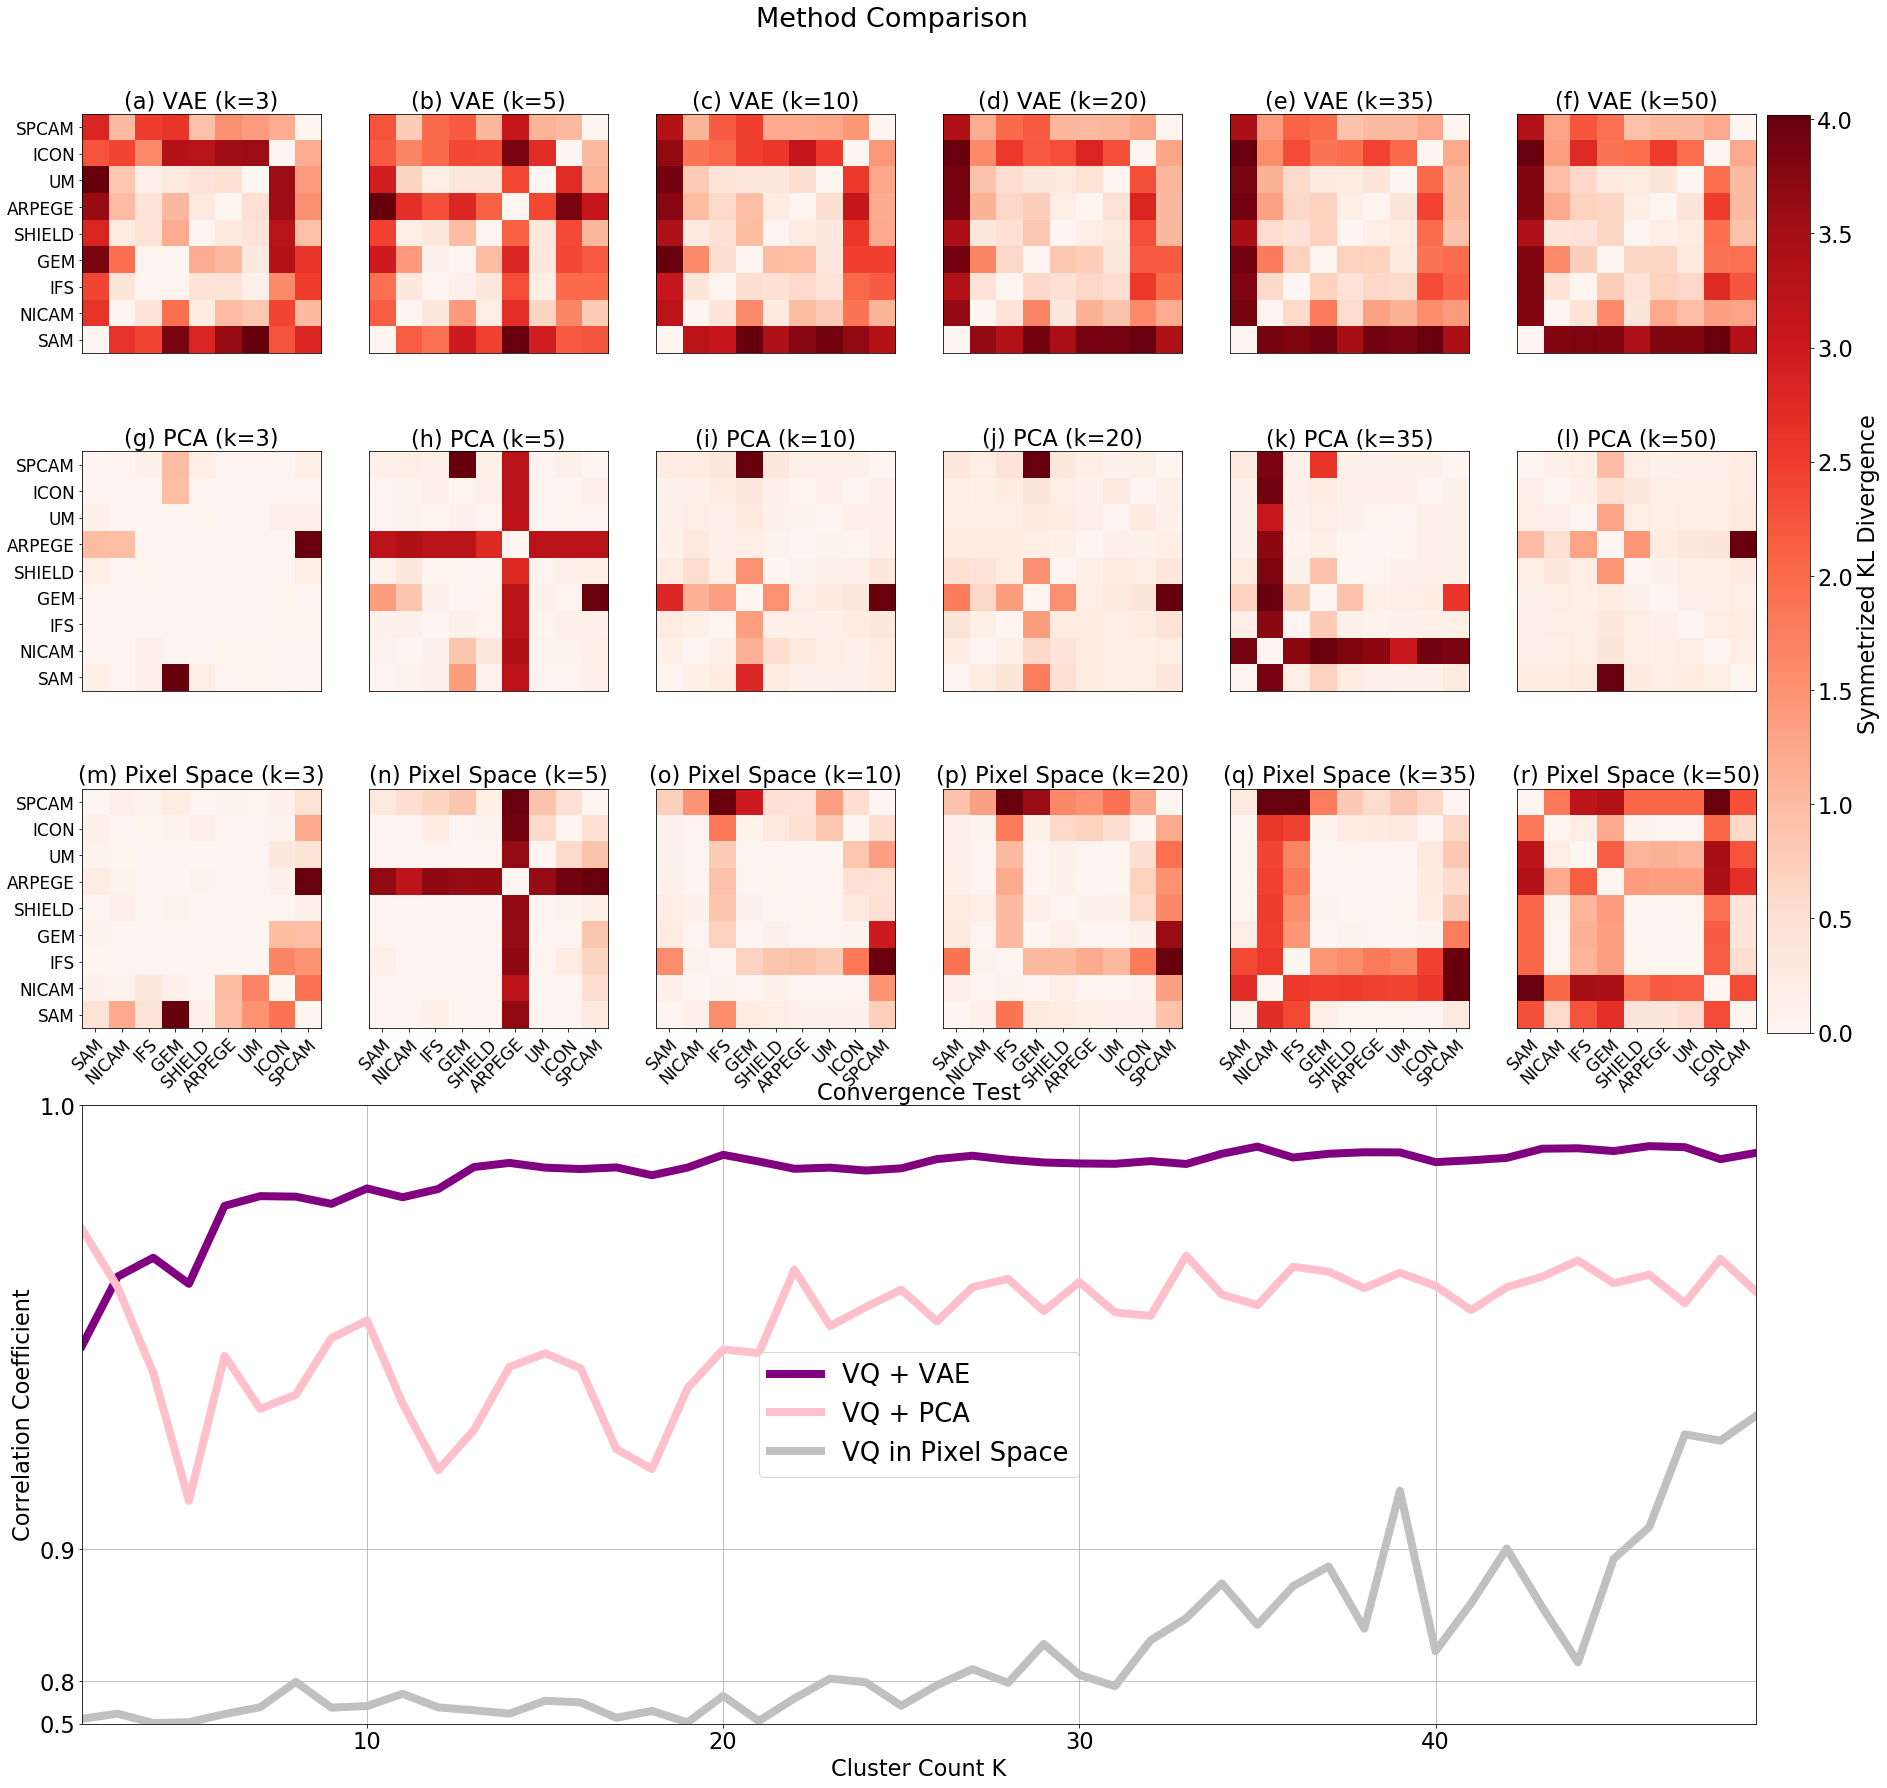

In [18]:
fig, ax = plt.subplots(5,6,figsize=(30,30))
gs=GridSpec(5,6)

models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
models_y = ["SPCAM","ICON", "UM", "ARPEGE", "SHIELD", "GEM", "IFS", "NICAM", "SAM"]

im = ax[0,0].imshow(VAE_K_3, cmap="Reds")
ax[0,0].set_title(r"(a) VAE (k=3)", fontsize=fz)
ax[0,0].set_yticks(np.arange(len(models)))
ax[0,0].set_xticks([])
ax[0,0].set_yticklabels(models_y, fontsize=fz*0.75)

im = ax[0,1].imshow(np.flipud(VAE_K_5), cmap="Reds")
ax[0,1].set_title(r"(b) VAE (k=5)", fontsize=fz)
ax[0,1].set_yticks([])
ax[0,1].set_xticks([])

im = ax[0,2].imshow(np.flipud(VAE_K_10), cmap="Reds")
ax[0,2].set_title(r"(c) VAE (k=10)", fontsize=fz)
ax[0,2].set_yticks([])
ax[0,2].set_xticks([])

im = ax[0,3].imshow(np.flipud(VAE_K_20), cmap="Reds")
ax[0,3].set_title(r"(d) VAE (k=20)", fontsize=fz)
ax[0,3].set_yticks([])
ax[0,3].set_xticks([])

im = ax[0,4].imshow(np.flipud(VAE_K_35), cmap="Reds")
ax[0,4].set_title(r"(e) VAE (k=35)", fontsize=fz)
ax[0,4].set_yticks([])
ax[0,4].set_xticks([])

im = ax[0,5].imshow(VAE_K_50, cmap="Reds")
ax[0,5].set_title(r"(f) VAE (k=50)", fontsize=fz)
ax[0,5].set_yticks([])
ax[0,5].set_xticks([])

im = ax[1,0].imshow(PCA_K_3, cmap="Reds")
ax[1,0].set_title(r"(g) PCA (k=3)", fontsize=fz)
ax[1,0].set_yticks(np.arange(len(models)))
ax[1,0].set_xticks([])
ax[1,0].set_yticklabels(models_y, fontsize=fz*0.75)

im = ax[1,1].imshow(np.flipud(PCA_K_5), cmap="Reds")
ax[1,1].set_title(r"(h) PCA (k=5)", fontsize=fz)
ax[1,1].set_yticks([])
ax[1,1].set_xticks([])

im = ax[1,2].imshow(np.flipud(PCA_K_10), cmap="Reds")
ax[1,2].set_title(r"(i) PCA (k=10)", fontsize=fz)
ax[1,2].set_yticks([])
ax[1,2].set_xticks([])

im = ax[1,3].imshow(np.flipud(PCA_K_20), cmap="Reds")
ax[1,3].set_title(r"(j) PCA (k=20)", fontsize=fz)
ax[1,3].set_yticks([])
ax[1,3].set_xticks([])

im = ax[1,4].imshow(np.flipud(PCA_K_35), cmap="Reds")
ax[1,4].set_title(r"(k) PCA (k=35)", fontsize=fz)
ax[1,4].set_yticks([])
ax[1,4].set_xticks([])

im = ax[1,5].imshow(PCA_K_50, cmap="Reds")
ax[1,5].set_title(r"(l) PCA (k=50)", fontsize=fz)
ax[1,5].set_yticks([])
ax[1,5].set_xticks([])

im = ax[2,0].imshow(K_Means_K_3, cmap="Reds")
ax[2,0].set_title(r"(m) Pixel Space (k=3)", fontsize=fz)
ax[2,0].set_yticks(np.arange(len(models)))
ax[2,0].set_xticks(np.arange(len(models)))
ax[2,0].set_xticklabels(models, fontsize=fz*0.75)
ax[2,0].set_yticklabels(models_y, fontsize=fz*0.75)

im = ax[2,1].imshow(np.flipud(K_Means_K_5), cmap="Reds")
ax[2,1].set_title(r"(n) Pixel Space (k=5)", fontsize=fz)
ax[2,1].set_yticks([])
ax[2,1].set_xticks(np.arange(len(models)))
ax[2,1].set_xticklabels(models, fontsize=fz*0.75)

im = ax[2,2].imshow(np.flipud(K_Means_K_10), cmap="Reds")
ax[2,2].set_title(r"(o) Pixel Space (k=10)", fontsize=fz)
ax[2,2].set_yticks([])
ax[2,2].set_xticks(np.arange(len(models)))
ax[2,2].set_xticklabels(models, fontsize=fz*0.75)

im = ax[2,3].imshow(np.flipud(K_Means_K_20), cmap="Reds")
ax[2,3].set_title(r"(p) Pixel Space (k=20)", fontsize=fz)
ax[2,3].set_yticks([])
ax[2,3].set_xticks(np.arange(len(models)))
ax[2,3].set_xticklabels(models, fontsize=fz*0.75)

im = ax[2,4].imshow(np.flipud(K_Means_K_35), cmap="Reds")
ax[2,4].set_title(r"(q) Pixel Space (k=35)", fontsize=fz)
ax[2,4].set_yticks([])
ax[2,4].set_xticks(np.arange(len(models)))
ax[2,4].set_xticklabels(models, fontsize=fz*0.75)

im = ax[2,5].imshow(K_Means_K_50, cmap="Reds")
ax[2,5].set_title(r"(r) Pixel Space (k=50)", fontsize=fz)
ax[2,5].set_yticks([])
ax[2,5].set_xticks(np.arange(len(models)))
ax[2,5].set_xticklabels(models, fontsize=fz*0.75)

cbar_ax = fig.add_axes([0.905, 0.445, 0.02, 0.425])
cbar = fig.colorbar(im, cax=cbar_ax, fraction=0.050, orientation='vertical')
cbar.set_label('Symmetrized KL Divergence', fontsize=fz)
cbar.ax.tick_params(labelsize=fz) 

plt.setp(ax[2,0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[2,1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[2,2].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[2,3].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[2,4].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[2,5].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax3=fig.add_subplot(gs[3:,:])
ax3.set_xlabel("Cluster Count K", fontsize=fz)
ax3.set_ylabel("Correlation Coefficient", fontsize=fz)

x = np.arange(2,50,1)
ax3.plot(x, np.abs(vae_dummy_array_abs_sum), linewidth=8, color="purple", label='VQ + VAE')
ax3.plot(x, np.abs(pca_dummy_array_abs_sum), linewidth=8, color="pink", label='VQ + PCA')
ax3.plot(x, np.abs(k_dummy_array_abs_sum), linewidth=8, color="silver", label='VQ in Pixel Space')
ax3.set_ylim(0.5, 1)

ax3.set_title("Convergence Test", fontsize=fz)
ax3.legend(fontsize=fz*1.15)
ax3.grid()
ax3.set_xlim(2,49)
ax3.tick_params(axis='both', which='major', labelsize=fz)

def forward(x):
    return x**(12)


def inverse(x):
    return x**(1/12)

ax3.set_yscale('function', functions=(forward, inverse))
ax3.yaxis.get_major_ticks()[-4].draw = lambda *args:None
ax3.yaxis.get_major_ticks()[-5].draw = lambda *args:None

fig.delaxes(ax[3,0])
fig.delaxes(ax[3,1])
fig.delaxes(ax[3,2])
fig.delaxes(ax[3,3])
fig.delaxes(ax[3,4])
fig.delaxes(ax[3,5])

fig.delaxes(ax[4,0])
fig.delaxes(ax[4,1])
fig.delaxes(ax[4,2])
fig.delaxes(ax[4,3])
fig.delaxes(ax[4,4])
fig.delaxes(ax[4,5])

plt.suptitle("Method Comparison", y=0.92)
#plt.subplots_adjust(hspace=0.08)
plt.savefig("Figures/Figure_8.png")
plt.savefig("Figures/Figure_8.pdf")
print(" ")